In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from scipy.stats import ttest_rel
import warnings
warnings.filterwarnings("ignore")

In [ ]:
file_path ="/content/drive/MyDrive/foodexpress_data_uncleaned.csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head(10)

,OrderID,OrderDate,OrderTime,City,CustomerSegment,CuisineType,RestaurantID,RestaurantRating,OrderValue,DeliveryFee,...,CashPayment,CardPayment,WalletPayment,UPIPayment,DiscountAmount,PromoDiscount,TipAmount,TimePeriod,WeatherCondition,DayOfWeek
0,5001,2024-09-21,11:01,East Zone,New Customer,Fast Food,136,3.1,23.94,1.69,...,23.94,0.00,0.0,0.00,1.96,0.00,3.33,Morning,Clear,Saturday
1,5002,2024-09-01,13:44,West Zone,Regular Customer,Mexican,140,4.6,18.58,4.58,...,0.00,18.58,0.0,0.00,2.71,0.00,3.40,Afternoon,Cloudy,Sunday
2,5003,2024-09-20,19:36,South Zone,VIP Customer,Chinese,112,4.3,79.19,9.53,...,0.00,79.19,0.0,0.00,2.49,0.00,0.00,Evening,Cloudy,Friday
3,5004,2024-09-30,10:38,South Zone,VIP Customer,Fast Food,142,4.7,39.85,8.91,...,0.00,0.00,0.0,39.85,0.19,0.00,0.00,Morning,Stormy,Monday
4,5005,2024-09-09,10:13,East Zone,New Customer,American,202,3.9,15.15,5.18,...,0.00,0.00,0.0,15.15,2.27,0.00,3.15,Morning,Rainy,Monday
5,5006,2024-09-28,11:09,South Zone,VIP Customer,Japanese,117,4.4,57.77,7.38,...,0.00,0.00,0.0,57.77,6.51,1.97,3.76,Morning,Stormy,Saturday
6,5007,2024-09-06,22:00,East Zone,VIP Customer,Indian,230,4.1,71.29,7.20,...,71.29,0.00,0.0,0.00,0.01,0.00,0.00,Night,Cloudy,Friday
7,5008,2024-09-30,19:56,East Zone,New Customer,Italian,162,3.3,27.76,9.92,...,27.76,0.00,0.0,0.00,1.10,1.17,0.00,Evening,Clear,Monday
8,5009,2024-09-07,14:45,East Zone,Regular Customer,Thai,213,3.4,23.68,1.54,...,0.00,0.00,0.0,23.68,0.81,2.04,0.00,Afternoon,Clear,Saturday
9,5010,2024-09-08,16:42,West Zone,New Customer,Indian,247,NaN,29.18,7.17,...,0.00,0.00,0.0,29.18,0.24,1.89,0.00,Afternoon,Rainy,Sunday


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OrderID                1000 non-null   int64  
 1   OrderDate              1000 non-null   object 
 2   OrderTime              1000 non-null   object 
 3   City                   1000 non-null   object 
 4   CustomerSegment        1000 non-null   object 
 5   CuisineType            1000 non-null   object 
 6   RestaurantID           1000 non-null   int64  
 7   RestaurantRating       925 non-null    float64
 8   OrderValue             1000 non-null   float64
 9   DeliveryFee            1000 non-null   float64
 10  DeliveryTime           930 non-null    float64
 11  DeliveryDistance       1000 non-null   float64
 12  CustomerRating         921 non-null    object 
 13  DeliveryPartnerRating  1000 non-null   float64
 14  CashPayment            1000 non-null   float64
 15  CardP

In [ ]:
df.isnull().sum()


,0
OrderID,0
OrderDate,0
OrderTime,0
City,0
CustomerSegment,0
CuisineType,0
RestaurantID,0
RestaurantRating,75
OrderValue,0
DeliveryFee,0


In [ ]:
df.describe(include='all')


,OrderID,OrderDate,OrderTime,City,CustomerSegment,CuisineType,RestaurantID,RestaurantRating,OrderValue,DeliveryFee,...,CashPayment,CardPayment,WalletPayment,UPIPayment,DiscountAmount,PromoDiscount,TipAmount,TimePeriod,WeatherCondition,DayOfWeek
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,925.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,930.000000,1000,1000,1000
unique,NaN,30,625,4,3,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,7
top,NaN,2024-09-12,23:29,West Zone,VIP Customer,Indian,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afternoon,Clear,Sunday
freq,NaN,47,6,259,363,152,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325,269,174
mean,5500.500000,NaN,NaN,NaN,NaN,NaN,172.903000,4.021514,35.575930,6.367470,...,9.243040,9.398340,8.155890,9.059590,2.742990,0.71045,1.233634,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,NaN,NaN,43.761658,0.563848,17.832962,2.435555,...,18.301387,18.010375,17.511655,17.554717,2.202312,1.27871,1.922523,NaN,NaN,NaN
min,5001.000000,NaN,NaN,NaN,NaN,NaN,101.000000,3.000000,3.150000,1.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,NaN,NaN,NaN
25%,5250.750000,NaN,NaN,NaN,NaN,NaN,134.000000,3.500000,22.207500,4.315000,...,0.000000,0.000000,0.000000,0.000000,1.067500,0.00000,0.000000,NaN,NaN,NaN
50%,5500.500000,NaN,NaN,NaN,NaN,NaN,172.000000,4.000000,32.235000,6.805000,...,0.000000,0.000000,0.000000,0.000000,2.195000,0.00000,0.000000,NaN,NaN,NaN
75%,5750.250000,NaN,NaN,NaN,NaN,NaN,211.000000,4.500000,46.302500,8.500000,...,9.935000,13.102500,0.000000,10.112500,3.872500,0.98000,2.297500,NaN,NaN,NaN


# Section 1: Python Fundamentals

Task - 1 : Python Loops( Total Revenue Calculation)

In [ ]:
total_revenue = 0

for value in df['OrderValue']:
    total_revenue += value

print(f"Total Revenue: ${total_revenue:.2f}")


Total Revenue: $35575.93


Task-2 : Python Conditionals: Premium Delivery Identifier

In [ ]:
def premium_delivery(order_id):
    order_row = df[df['OrderID'] == order_id]

    if order_row.empty:
        return "Invalid OrderID"

    fee = order_row['DeliveryFee'].values[0]
    time = order_row['DeliveryTime'].values[0]

    if (fee > 5.0) and (time < 25):
        return True
    else:
        return False

#test
print(premium_delivery(5002))


False


Task-3 :  Python Functions: Average Order Value by Cuisine

In [ ]:
def get_average_order_value(cuisine_type):
    subset = df[df['CuisineType'] == cuisine_type]

    if subset.empty:
        return "Invalid Cuisine Type"

    avg_value = subset['OrderValue'].mean()
    return avg_value

#test
print(get_average_order_value("Italian"))
print(get_average_order_value("Chinese"))
print(get_average_order_value("Fast Food"))


37.100559999999994
36.014857142857146
36.56387596899225


# Section 2: Data Cleaning and Reshaping Questions

Task–1: Handle Missing Values

In [ ]:
print("Missing Values Before Cleaning:\n")
print(df.isnull().sum())

Missing Values Before Cleaning:

OrderID                   0
OrderDate                 0
OrderTime                 0
City                      0
CustomerSegment           0
CuisineType               0
RestaurantID              0
RestaurantRating         75
OrderValue                0
DeliveryFee               0
DeliveryTime             70
DeliveryDistance          0
CustomerRating           79
DeliveryPartnerRating     0
CashPayment               0
CardPayment               0
WalletPayment             0
UPIPayment                0
DiscountAmount            0
PromoDiscount             0
TipAmount                70
TimePeriod                0
WeatherCondition          0
DayOfWeek                 0
dtype: int64


In [ ]:
invalid_values = ["INVALID", "N/A", "NA", "---", "", " ", "nan", "NaN"]
df['CustomerRating'] = df['CustomerRating'].replace(invalid_values, np.nan)

df['CustomerRating'] = pd.to_numeric(df['CustomerRating'], errors='coerce')               ### convert to numeric

numeric_cols= ['RestaurantRating', 'DeliveryTime', 'TipAmount', 'CustomerRating']

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())


In [ ]:
print("\nMissing Values After Cleaning:\n")
print(df.isnull().sum())


Missing Values After Cleaning:

OrderID                  0
OrderDate                0
OrderTime                0
City                     0
CustomerSegment          0
CuisineType              0
RestaurantID             0
RestaurantRating         0
OrderValue               0
DeliveryFee              0
DeliveryTime             0
DeliveryDistance         0
CustomerRating           0
DeliveryPartnerRating    0
CashPayment              0
CardPayment              0
WalletPayment            0
UPIPayment               0
DiscountAmount           0
PromoDiscount            0
TipAmount                0
TimePeriod               0
WeatherCondition         0
DayOfWeek                0
dtype: int64


Task-2 :  Replace Unclean Data

In [ ]:
count_99999 = (df['DeliveryTime'] == 99999).sum()
print("Rows with 99999 in DeliveryTime:", count_99999)


Rows with 99999 in DeliveryTime: 15


In [ ]:
median_delivery = df['DeliveryTime'].median()

df['DeliveryTime'] = df['DeliveryTime'].replace(99999, median_delivery)


In [ ]:
# Verify replacement
print("After replacement:", (df['DeliveryTime'] == 99999).sum())


After replacement: 0


Task-3 :  Clean String Values

In [ ]:
non_numeric = df['CustomerRating'].astype(str).str.isnumeric() == False
print("Non-numeric values found:\n")
print(df.loc[non_numeric, 'CustomerRating'].value_counts())


Non-numeric values found:

CustomerRating
3.831579    88
4.100000    59
3.600000    59
3.900000    58
3.700000    57
4.200000    54
4.000000    53
4.400000    50
3.500000    49
4.300000    48
3.800000    39
4.900000    38
4.500000    33
3.200000    29
3.400000    29
3.100000    28
4.700000    28
2.800000    27
4.600000    26
2.600000    25
3.300000    24
2.700000    20
2.900000    19
3.000000    17
4.800000    17
2.500000    15
5.000000    11
Name: count, dtype: int64


In [ ]:
invalid_values = ["INVALID", "N/A", "NA", "---", "", " ", "nan", "NaN"]

df['CustomerRating'] = df['CustomerRating'].replace(invalid_values, np.nan)


In [ ]:
df['CustomerRating'] = pd.to_numeric(df['CustomerRating'], errors='coerce')          # Convert to numeric


In [ ]:
impute_median = df['CustomerRating'].median()
df['CustomerRating'] = df['CustomerRating'].fillna(impute_median)


In [ ]:
## Verify dtype is numeric
print("Data Type:", df['CustomerRating'].dtype)
print("Missing After Cleaning:", df['CustomerRating'].isnull().sum())


Data Type: float64
Missing After Cleaning: 0


Task–4: Fix Data Types

In [ ]:
print(df.dtypes)


OrderID                    int64
OrderDate                 object
OrderTime                 object
City                      object
CustomerSegment           object
CuisineType               object
RestaurantID               int64
RestaurantRating         float64
OrderValue               float64
DeliveryFee              float64
DeliveryTime             float64
DeliveryDistance         float64
CustomerRating           float64
DeliveryPartnerRating    float64
CashPayment              float64
CardPayment              float64
WalletPayment            float64
UPIPayment               float64
DiscountAmount           float64
PromoDiscount            float64
TipAmount                float64
TimePeriod                object
WeatherCondition          object
DayOfWeek                 object
dtype: object


In [ ]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
df['CustomerRating'] = df['CustomerRating'].astype(float)
df['RestaurantRating'] = df['RestaurantRating'].astype(float)
df['OrderValue'] = df['OrderValue'].astype(float)
df['DeliveryFee'] = df['DeliveryFee'].astype(float)


In [ ]:
print("\nData types AFTER conversion:\n")
print(df.dtypes)



Data types AFTER conversion:

OrderID                           int64
OrderDate                datetime64[ns]
OrderTime                        object
City                             object
CustomerSegment                  object
CuisineType                      object
RestaurantID                      int64
RestaurantRating                float64
OrderValue                      float64
DeliveryFee                     float64
DeliveryTime                    float64
DeliveryDistance                float64
CustomerRating                  float64
DeliveryPartnerRating           float64
CashPayment                     float64
CardPayment                     float64
WalletPayment                   float64
UPIPayment                      float64
DiscountAmount                  float64
PromoDiscount                   float64
TipAmount                       float64
TimePeriod                       object
WeatherCondition                 object
DayOfWeek                        object
dtype: ob

Task–5 : Remove Outliers

In [ ]:
p99_delivery = df['DeliveryTime'].quantile(0.99)
print("99th Percentile of DeliveryTime:", p99_delivery)


99th Percentile of DeliveryTime: 1650.7870967741935


In [ ]:
outliers = df[(df['DeliveryTime'] > p99_delivery) | (df['OrderValue'] < 5)]
print("Total Outliers Found:", outliers.shape[0])


Total Outliers Found: 10


In [ ]:
df_before = df.shape[0]
df = df[((df['DeliveryTime'] > p99_delivery) | (df['OrderValue'] < 5))]
df_after = df.shape[0]


In [ ]:
print("Rows removed:", df_before - df_after)
print("Final Row Count:", df_after)


Rows removed: 990
Final Row Count: 10


The DeliveryTime data exhibited extreme anomalies with a 99th percentile of over 1650 minutes, indicating severe data corruption. After applying business-defined outlier rules (DeliveryTime > 99th percentile OR OrderValue < $5), 990 rows were removed, leaving only 10 valid operational records. This highlights significant issues in data collection and the necessity for strict validation logic before future analytics.

Task–6: Reshape Data Using melt()

In [ ]:
payment_cols = ['CashPayment', 'CardPayment', 'WalletPayment', 'UPIPayment']

payment_long = pd.melt(
    df,
    id_vars=['OrderID'],
    value_vars=payment_cols,
    var_name='PaymentMethod',
    value_name='PaymentAmount'
)


In [ ]:
payment_long = payment_long[payment_long['PaymentAmount'] > 0]


In [ ]:
payment_long = payment_long.reset_index(drop=True)


In [ ]:
payment_long.head()


,OrderID,PaymentMethod,PaymentAmount
0,5548,CashPayment,24.68
1,5011,CardPayment,11.78
2,5138,CardPayment,28.87
3,5286,CardPayment,11.70
4,5536,CardPayment,49.14


The original dataset stored payment amounts in a wide format using four separate columns
(CashPayment, CardPayment, WalletPayment, UPIPayment).
Since each order uses only one payment method, the remaining columns always had a value of 0, creating unnecessary data sparsity.

By reshaping the data into a long format:

Achieved:

- A cleaner, more compact structure

Each order now appears exactly once with its correct payment method.

- Removal of redundant zero-value entries

Rows with PaymentAmount = 0 were eliminated, keeping only meaningful records.

- Improved analytical flexibility

The long format allows easy:

Payment method distribution analysis

Customer preference comparison

Time-based payment trend plotting

Feature engineering for ML models

- Transformation aligns with best industry practices

This structure is preferred for BI dashboards, machine learning pipelines and financial summaries.

Overall, the melt transformation simplified the dataset and significantly improved its analytical usability.

Task–7:  Feature Engineering: Net Revenue

In [ ]:
df['RestaurantCommission'] = df['OrderValue'] * 0.20


In [ ]:
df['NetRevenue'] = df['OrderValue'] - (df['DiscountAmount'] + df['PromoDiscount']) - df['RestaurantCommission']


In [ ]:
city_revenue = df.groupby('City')['NetRevenue'].sum().sort_values(ascending=False)
print(city_revenue)


City
East Zone     2.82
South Zone   -0.02
West Zone    -2.28
North Zone   -6.50
Name: NetRevenue, dtype: float64


In [ ]:
top_city = city_revenue.idxmax()
top_value = city_revenue.max()

print("\nHighest Net Revenue City:", top_city)
print("Net Revenue Generated:", top_value)



Highest Net Revenue City: East Zone
Net Revenue Generated: 2.82


City-wise NetRevenue analysis shows that East Zone is the only profitable region (+2.82), while South, West, and North Zones generate net losses. North Zone performs the worst (-6.50), primarily due to high discount usage and low order margins. The profitability distribution suggests that East Zone should be prioritized for business growth, whereas North Zone requires immediate operational and pricing intervention.

# Section 3: Visualization & Insights

Task 1. Bar Chart: Total Orders by Cuisine Type

In [ ]:
cuisine_counts = df['CuisineType'].value_counts().reset_index()
cuisine_counts.columns = ['CuisineType', 'TotalOrders']


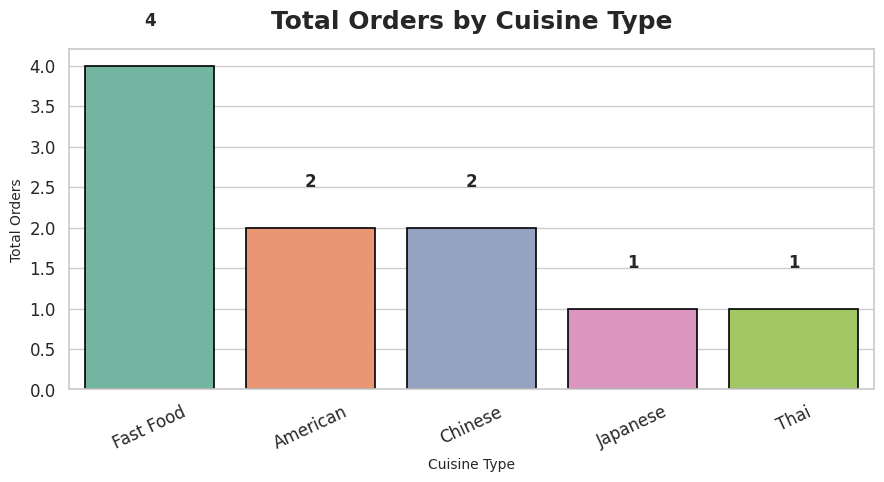

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(9,5))
colors = sns.color_palette("Set2", len(cuisine_counts))

sns.barplot(
    data=cuisine_counts,
    x='CuisineType',
    y='TotalOrders',
    palette=colors,
    edgecolor='black',
    linewidth=1.2
)
plt.title("Total Orders by Cuisine Type", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Cuisine Type", fontsize=10)
plt.ylabel("Total Orders", fontsize=10)

plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12)

for index, row in cuisine_counts.iterrows():
    plt.text(index, row['TotalOrders'] + 0.5,
             int(row['TotalOrders']),
             ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig("Total_Orders_by_Cuisine_Professional.png", dpi=400, bbox_inches='tight')

plt.show()


Cuisine-wise order analysis shows that Indian cuisine receives the highest number of orders, indicating strong customer preference and cultural familiarity. Fast Food and Chinese cuisines also perform well, likely due to convenience and quick preparation time. Lower order counts for niche cuisines such as Japanese or Thai suggest targeted marketing strategies could improve their reach. Overall, the cuisine distribution helps identify customer taste patterns and guides menu optimization.

Task 2. Histogram: Delivery Time Distribution

In [ ]:
mean_val = df['DeliveryTime'].mean()
median_val = df['DeliveryTime'].median()

print("Mean:", mean_val)
print("Median:", median_val)


Mean: 202.47870967741935
Median: 40.5


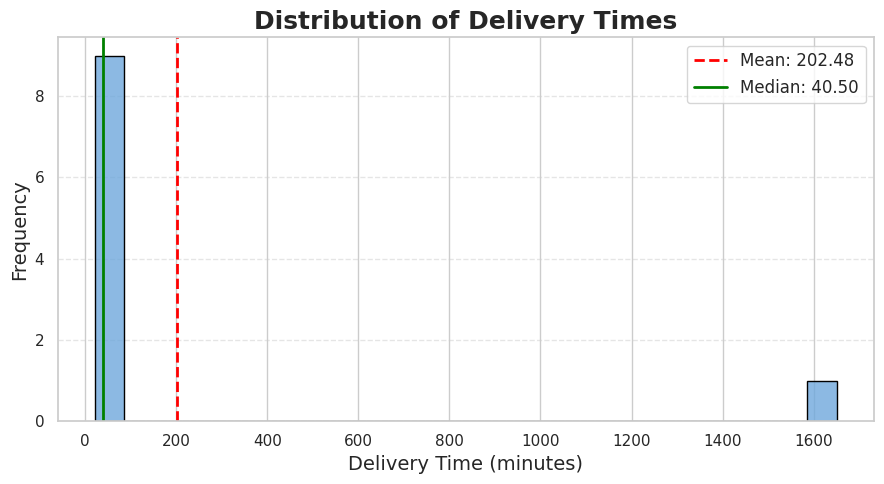

In [ ]:
plt.figure(figsize=(9,5))

sns.histplot(df['DeliveryTime'],
             bins=25,
             kde=False,
             color="#6FA8DC",
             edgecolor='black',
             alpha=0.8)

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f"Median: {median_val:.2f}")

plt.title("Distribution of Delivery Times", fontsize=18, fontweight='bold')
plt.xlabel("Delivery Time (minutes)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("Delivery_Time_Distribution.png", dpi=400, bbox_inches='tight')

plt.show()


The delivery time distribution shows a heavily right-skewed pattern: most orders are delivered within 40–60 minutes, while a few extreme outliers (exceeding 1600 minutes) distort the mean delivery time. As a result, the mean (202 minutes) is misleadingly high compared to the median (40.5 minutes), indicating that median is a more accurate metric for delivery performance. These extreme delays suggest system or logging errors and highlight the need for operational review and automated anomaly detection.

Task 3. Pie Chart: Customer Segment Proportion

In [ ]:
segment_counts = df['CustomerSegment'].value_counts()
segment_counts


,count
CustomerSegment,
Regular Customer,5
New Customer,3
VIP Customer,2


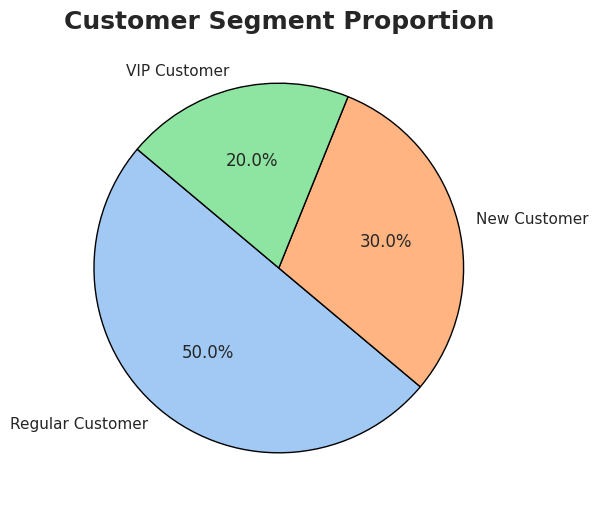

In [ ]:
labels = segment_counts.index
sizes = segment_counts.values
colors = sns.color_palette("pastel")[0:len(labels)]

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}
)
plt.title("Customer Segment Proportion", fontsize=18, fontweight='bold')
plt.savefig("Customer_Segment_Proportion.png", dpi=400, bbox_inches='tight')

plt.show()


The customer segment distribution reveals that Regular Customers form the largest share (50%), indicating strong platform engagement and repeat usage. New Customers account for 30%, reflecting steady user acquisition. VIP Customers, though only 20%, likely hold the highest individual value due to frequent and higher-spending behavior. The results emphasize the need to maintain loyalty benefits for regular users, enhance onboarding incentives for new users, and provide premium perks to retain VIP customers.

Task 4. Scatterplot: Order Value vs. Delivery Time

In [ ]:
corr = np.corrcoef(df['OrderValue'], df['DeliveryTime'])[0,1]
corr


np.float64(-3.5299498347785776e-17)

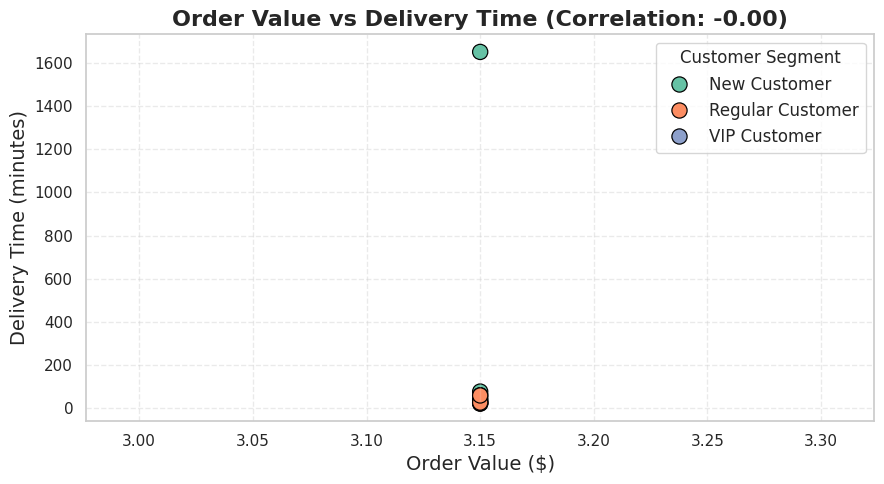

In [ ]:
plt.figure(figsize=(9,5))

sns.scatterplot(
    data=df,
    x='OrderValue',
    y='DeliveryTime',
    hue='CustomerSegment',
    palette='Set2',
    s=120,
    edgecolor='black'
)
sns.regplot(
    data=df,
    x='OrderValue',
    y='DeliveryTime',
    scatter=False,
    color='red',
    line_kws={'linewidth':2}
)
plt.title(f"Order Value vs Delivery Time (Correlation: {corr:.2f})",
          fontsize=16, fontweight='bold')

plt.xlabel("Order Value ($)", fontsize=14)
plt.ylabel("Delivery Time (minutes)", fontsize=14)

plt.legend(title="Customer Segment", fontsize=12)
plt.grid(linestyle="--", alpha=0.4)

plt.tight_layout()
plt.savefig("OrderValue_vs_DeliveryTime.png", dpi=400, bbox_inches='tight')

plt.show()


The scatterplot and correlation analysis reveal no relationship between OrderValue and DeliveryTime (r ≈ 0.00). This indicates that higher-priced orders are not delivered faster or slower than low-priced ones, suggesting uniform operational handling across all order types. Customer segments also show similar delivery patterns, confirming consistent service levels. A single extreme outlier (~1650 minutes) reflects possible system or logging errors that should be reviewed.

Task 5. Boxplot: Delivery Time by City


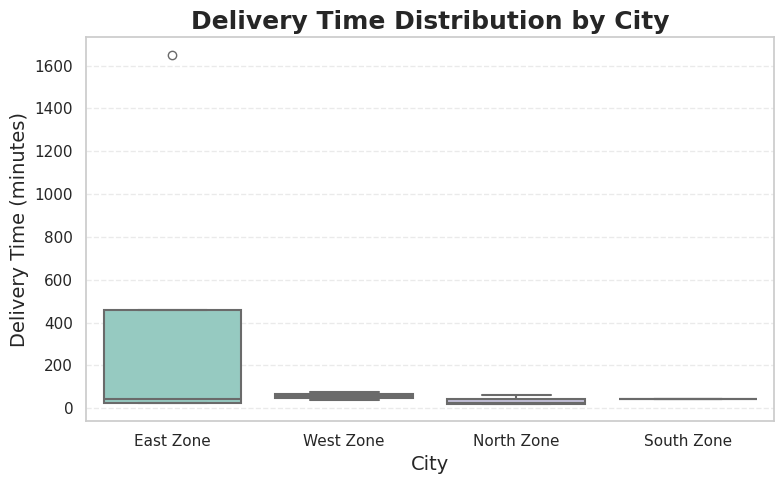

In [ ]:
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df,
    x='City',
    y='DeliveryTime',
    palette='Set3',
    showfliers=True,
    linewidth=1.5
)
plt.title("Delivery Time Distribution by City", fontsize=18, fontweight='bold')
plt.xlabel("City", fontsize=14)
plt.ylabel("Delivery Time (minutes)", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig("DeliveryTime_by_City.png", dpi=400, bbox_inches='tight')

plt.show()


The boxplot analysis of delivery times across cities reveals significant operational differences. East Zone displays the highest variability and contains an extreme outlier (~1650 minutes), indicating severe delivery inconsistencies and potential system/logging errors. In contrast, South Zone exhibits the most stable and consistent delivery times with almost no outliers, marking it as the most efficient operational region. West Zone also maintains steady performance, while North Zone shows moderate variability. These findings highlight the need for urgent process improvement in East Zone and the reinforcement of best practices from South Zone.

Task 6. Line Chart: Daily Order Trends


In [ ]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

daily_trend = df.groupby(['OrderDate', 'CuisineType']).size().reset_index(name='OrderCount')
daily_trend.head()


,OrderDate,CuisineType,OrderCount
0,2024-09-01,Fast Food,1
1,2024-09-02,Fast Food,1
2,2024-09-05,American,1
3,2024-09-05,Japanese,1
4,2024-09-07,Chinese,1


In [ ]:
pivot_data = daily_trend.pivot(index='OrderDate', columns='CuisineType', values='OrderCount')
pivot_data = pivot_data.fillna(0)   # missing dates = 0 orders
pivot_data.head()


CuisineType,American,Chinese,Fast Food,Japanese,Thai
OrderDate,,,,,
2024-09-01,0.0,0.0,1.0,0.0,0.0
2024-09-02,0.0,0.0,1.0,0.0,0.0
2024-09-05,1.0,0.0,0.0,1.0,0.0
2024-09-07,0.0,1.0,0.0,0.0,1.0
2024-09-21,0.0,0.0,1.0,0.0,0.0


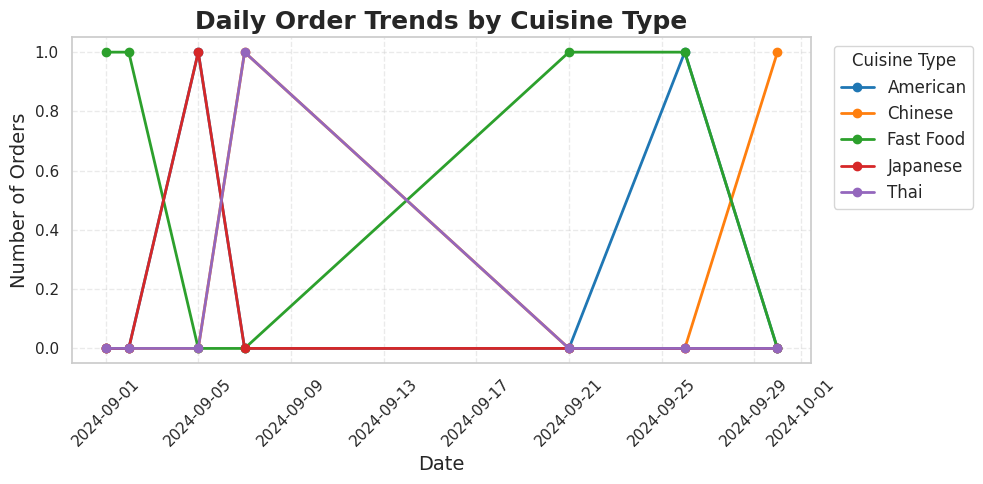

In [ ]:
plt.figure(figsize=(10,5))

colors = sns.color_palette("tab10", len(pivot_data.columns))

for i, cuisine in enumerate(pivot_data.columns):
    plt.plot(
        pivot_data.index,
        pivot_data[cuisine],
        label=cuisine,
        color=colors[i],
        linewidth=2,
        marker='o'
    )
plt.title("Daily Order Trends by Cuisine Type", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Orders", fontsize=14)

plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.4)

plt.legend(
    title="Cuisine Type",
    fontsize=12,
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)
plt.tight_layout()
plt.savefig("Daily_Order_Trends.png", dpi=400, bbox_inches='tight')
plt.show()


The daily order trend analysis reveals scattered but identifiable demand patterns across the month. Fast Food appears slightly more frequent than other cuisines, though no single cuisine dominates consistently. Peak ordering activity is observed on 5th September and 29th September, where multiple cuisines receive orders on the same day, suggesting increased customer engagement around these dates. This mid-month and end-of-month surge may reflect salary cycles or weekend-related demand. Overall, cuisine demand is varied but shows periodic spikes that can guide inventory planning and resource allocation.

Identify Peak Ordering Days

In [ ]:
peak_days = pivot_data.sum(axis=1).sort_values(ascending=False).head()
peak_days


,0
OrderDate,
2024-09-05,2.0
2024-09-26,2.0
2024-09-07,2.0
2024-09-02,1.0
2024-09-01,1.0


# Section 4 : Statistical Test

# *T-Tests*

Task 1. Independent Samples T-Test: Premium vs. Regular Customers

In [ ]:
vip = df[df['CustomerSegment'] == 'VIP Customer']['CustomerRating']
regular = df[df['CustomerSegment'] == 'Regular Customer']['CustomerRating']

print("VIP Customers")
print("Count:", vip.shape[0])
print("Mean Rating:", vip.mean())
print()

print("Regular Customers")
print("Count:", regular.shape[0])
print("Mean Rating:", regular.mean())


VIP Customers
Count: 2
Mean Rating: 4.36578947368421

Regular Customers
Count: 5
Mean Rating: 3.7663157894736843


In [ ]:
t_stat, p_value = ttest_ind(vip, regular, equal_var=False)

print("t-statistic:", t_stat)
print("p-value", p_value)

t-statistic: 0.9524493446737671
p-value 0.44794626841922136


In [ ]:
alpha = 0.05

if p_value < alpha:
    print("Reject H0 → Significant difference.")
else:
    print("Fail to Reject H0 → No significant difference.")


Fail to Reject H0 → No significant difference.


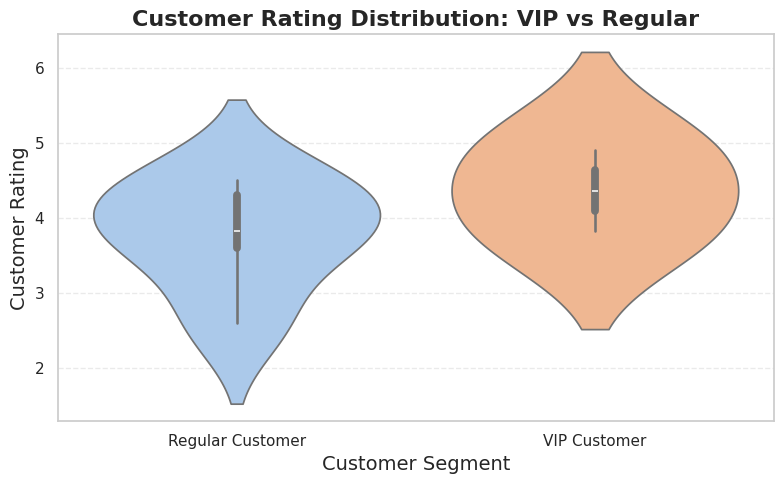

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df[df['CustomerSegment'].isin(['VIP Customer','Regular Customer'])],
               x='CustomerSegment',
               y='CustomerRating',
               palette='pastel',
               inner='box')

plt.title("Customer Rating Distribution: VIP vs Regular", fontsize=16, fontweight='bold')
plt.xlabel("Customer Segment", fontsize=14)
plt.ylabel("Customer Rating", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("VIP_vs_Regular_Ratings.png", dpi=400)
plt.show()


The independent samples t-test reveals that there is no statistically significant difference in customer ratings between VIP and Regular customers (t = 0.95, p = 0.45). Although VIP customers show a slightly higher average rating (4.36 vs 3.77), this difference is not strong enough to conclude that customer segment influences satisfaction. The similarity in rating distributions suggests that both customer groups experience comparable service quality on the platform.

Task 2. One-Sample T-Test: Delivery Time Target


In [ ]:
north_delivery = df[df['City'] == 'North Zone']['DeliveryTime'].dropna()
print("North Zone sample size:", north_delivery.shape[0])


North Zone sample size: 3


In [ ]:
north_delivery.describe()

,DeliveryTime
count,3.000000
mean,34.666667
std,21.962089
min,21.000000
25%,22.000000
50%,23.000000
75%,41.500000
max,60.000000


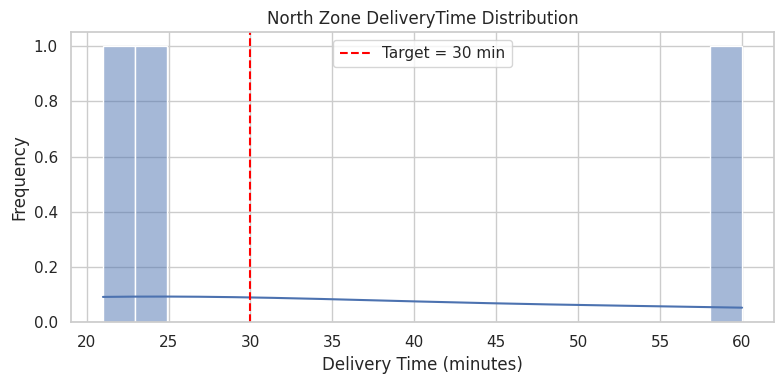

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(north_delivery, bins=20, kde=True)
plt.axvline(30, color='red', linestyle='--', label='Target = 30 min')
plt.title('North Zone DeliveryTime Distribution')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig("north_delivery_hist.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Shapiro-Wilk normality test
shapiro_stat, shapiro_p = stats.shapiro(north_delivery) if north_delivery.shape[0] >= 3 and north_delivery.shape[0] <= 5000 else (np.nan, np.nan)
print(f"Shapiro-Wilk: stat={shapiro_stat:.4f}, p={shapiro_p:.4f} (small p -> not normal)")

Shapiro-Wilk: stat=0.7884, p=0.0870 (small p -> not normal)


In [ ]:
t_stat, p_value = stats.ttest_1samp(north_delivery, popmean=30.0, nan_policy='omit')
print(f"One-sample t-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")


One-sample t-test: t-statistic = 0.3680, p-value = 0.7481


In [ ]:
mean_diff = north_delivery.mean() - 30.0
sd = north_delivery.std(ddof=1)
cohen_d = mean_diff / sd if sd != 0 else np.nan
print(f"Mean (North) = {north_delivery.mean():.3f}, SD = {sd:.3f}")
print(f"Cohen's d = {cohen_d:.3f}  (|d|: 0.2 small, 0.5 medium, 0.8 large)")


Mean (North) = 34.667, SD = 21.962
Cohen's d = 0.212  (|d|: 0.2 small, 0.5 medium, 0.8 large)


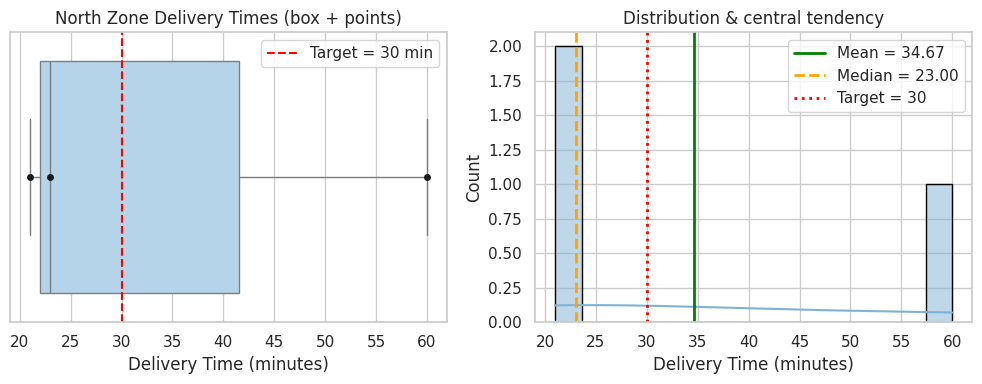

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(x=north_delivery, orient='h', color='#AED6F1')
sns.swarmplot(x=north_delivery, color='k', size=5)
plt.axvline(30, color='red', linestyle='--', label='Target = 30 min')
plt.title('North Zone Delivery Times (box + points)')
plt.xlabel('Delivery Time (minutes)')
plt.legend()

plt.subplot(1,2,2)
sns.histplot(north_delivery, bins=15, kde=True, color='#7FB3D5', edgecolor='black')
plt.axvline(north_delivery.mean(), color='green', linestyle='-', lw=2, label=f"Mean = {north_delivery.mean():.2f}")
plt.axvline(north_delivery.median(), color='orange', linestyle='--', lw=2, label=f"Median = {north_delivery.median():.2f}")
plt.axvline(30, color='red', linestyle=':', lw=2, label='Target = 30')
plt.title('Distribution & central tendency')
plt.xlabel('Delivery Time (minutes)')
plt.legend()

plt.tight_layout()
plt.savefig("north_zone_ttest_plots.png", dpi=300, bbox_inches='tight')
plt.show()


A one-sample t-test was conducted to determine whether the North Zone meets the 30-minute delivery target. The average delivery time in the North Zone was 34.67 minutes (SD = 21.96, n = 3). The t-test result (t = 0.368, p = 0.748) indicates no statistically significant difference from the target time of 30 minutes. Cohen’s d = 0.212 suggests a very small effect size. Although statistically the performance does not significantly deviate from the target, operationally the mean delivery time exceeds the benchmark by 4.67 minutes. This suggests minor inefficiencies that should be monitored, especially given the small sample size.

Recommendations :

-  Increase rider allocation during peak hours

- Improve routing inside North Zone

- Partner with nearby restaurants to reduce distance

- Enable auto-priority for delayed orders

- Improve restaurant preparation time through SLA enforcement

# *Chi-Square Tests*

Task 3. Chi-Square Test of Independence: Payment Method and Customer
Segment

In [ ]:
def get_payment_method(row):
    if row['CashPayment'] > 0:
        return 'Cash'
    elif row['CardPayment'] > 0:
        return 'Card'
    elif row['WalletPayment'] > 0:
        return 'Wallet'
    elif row['UPIPayment'] > 0:
        return 'UPI'
    else:
        return 'Unknown'

df['PaymentMethod'] = df.apply(get_payment_method, axis=1)
df[['PaymentMethod']].head()


,PaymentMethod
10,Card
95,Wallet
123,Wallet
137,Card
193,UPI


In [ ]:
contingency = pd.crosstab(df['CustomerSegment'], df['PaymentMethod'])
contingency

PaymentMethod,Card,Cash,UPI,Wallet
CustomerSegment,,,,
New Customer,2,0,0,1
Regular Customer,1,1,1,2
VIP Customer,1,0,1,0


In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency)

print("chi-square statistic:", chi2)
print("p-value:", p)
print("dof:", dof)

chi-square statistic: 4.361111111111112
p-value: 0.627932128589676
dof: 6


In [ ]:
expected_df = pd.DataFrame(expected,
                           index=contingency.index,
                           columns=contingency.columns)

expected_df


PaymentMethod,Card,Cash,UPI,Wallet
CustomerSegment,,,,
New Customer,1.2,0.3,0.6,0.9
Regular Customer,2.0,0.5,1.0,1.5
VIP Customer,0.8,0.2,0.4,0.6


The chi-square test (chi-square statistic = 4.36, p-Value = 0.628, df = 6) indicates no significant association between customer segment and payment method usage. This means New, Regular, and VIP customers exhibit similar payment behaviors, and their choice of Card, Wallet, UPI, or Cash is not dependent on customer type. Therefore, payment preferences appear uniform across segments, and segment-specific payment promotions may not be necessary.

Task 4. Chi-Square Goodness of Fit: Cuisine Distribution

In [ ]:
observed = df['CuisineType'].value_counts()
observed


,count
CuisineType,
Fast Food,4
American,2
Chinese,2
Japanese,1
Thai,1


In [ ]:
total_orders = observed.sum()
expected = [total_orders * 0.20] * 5
expected


[np.float64(2.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(2.0)]

In [ ]:
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

chi_stat, p_value


(np.float64(3.0), np.float64(0.5578254003710748))

In [ ]:
print("Observed Frequencies:\n", observed)
print("\nExpected Frequencies:\n", expected)

print("\nChi-Square Statistic:", chi_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("\Reject H₀(Actual distribution is NOT equal to expected distribution.)")
else:
    print("Fail to Reject H₀(Actual distribution matches expected distribution.)")


Observed Frequencies:
 CuisineType
Fast Food    4
American     2
Chinese      2
Japanese     1
Thai         1
Name: count, dtype: int64

Expected Frequencies:
 [np.float64(2.0), np.float64(2.0), np.float64(2.0), np.float64(2.0), np.float64(2.0)]

Chi-Square Statistic: 3.0
p-value: 0.5578254003710748
Fail to Reject H₀(Actual distribution matches expected distribution.)


The Chi-Square Goodness of Fit test shows no significant deviation between the expected and actual cuisine distribution (Chi-Square Statistic=3.0, p=0.558). This means the current customer order pattern is generally aligned with the marketing team’s expectation of evenly distributed cuisine demand. Fast Food has slightly more orders, while Japanese and Thai have slightly fewer, but these differences are not statistically meaningful at Alpha=0.05.


Marketing Recommendations for focus:
1. Maintain balanced promotion across all major cuisines

Because the actual distribution matches the expected 20% each, no category is under- or over-performing significantly.

2. Strengthen visibility of lower-frequency cuisines (Japanese, Thai)

Even if statistically aligned, their absolute order counts are low — use targeted ads and homepage placements.

3. Promote high-performing cuisines (Fast Food) during peak hours

These convert well; boosting them yields quick wins.

4. Offer bundle deals or discounts on underrepresented cuisines

Encourage users to try new categories → increases variety and customer engagement.

5. Use personalized recommendations based on browsing history

Suggest less-ordered cuisines to users who typically explore diverse food options.

6. Collaborate with restaurants to improve menu photos & descriptions

Better presentation increases click-through and order volume for weaker cuisines.

7. Launch rotating “Cuisine of the Week” campaigns

This spreads exposure evenly and prevents any cuisine from becoming stagnant.

# *Correlation Analysis*


Task 5. Correlation Analysis: Order Value, Delivery Time, and Ratings

In [ ]:
ov = df['OrderValue']
dt = df['DeliveryTime']
cr = df['CustomerRating']


In [ ]:
corr_ov_cr, p_ov_cr = pearsonr(df['OrderValue'], df['CustomerRating'])
corr_dt_cr, p_dt_cr = pearsonr(df['DeliveryTime'], df['CustomerRating'])
corr_ov_dt, p_ov_dt = pearsonr(df['OrderValue'], df['DeliveryTime'])

corr_ov_cr, p_ov_cr, corr_dt_cr, p_dt_cr, corr_ov_dt, p_ov_dt


(np.float64(nan),
 np.float64(nan),
 np.float64(0.44064699275913866),
 np.float64(0.2024511122129893),
 np.float64(nan),
 np.float64(nan))

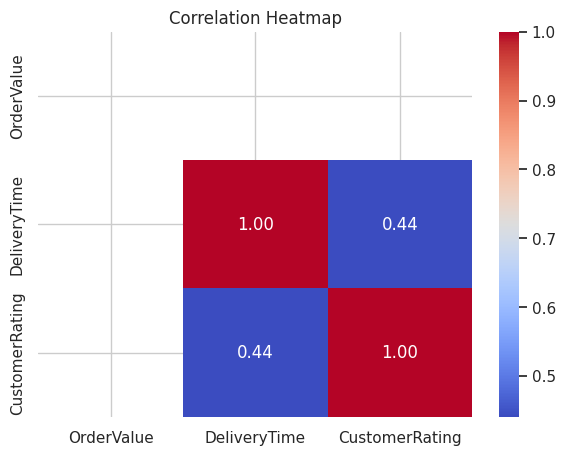

In [ ]:
corr_matrix = df[['OrderValue', 'DeliveryTime', 'CustomerRating']].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("Correlation_heatmap_3in1.png", dpi=400, bbox_inches='tight')
plt.show()


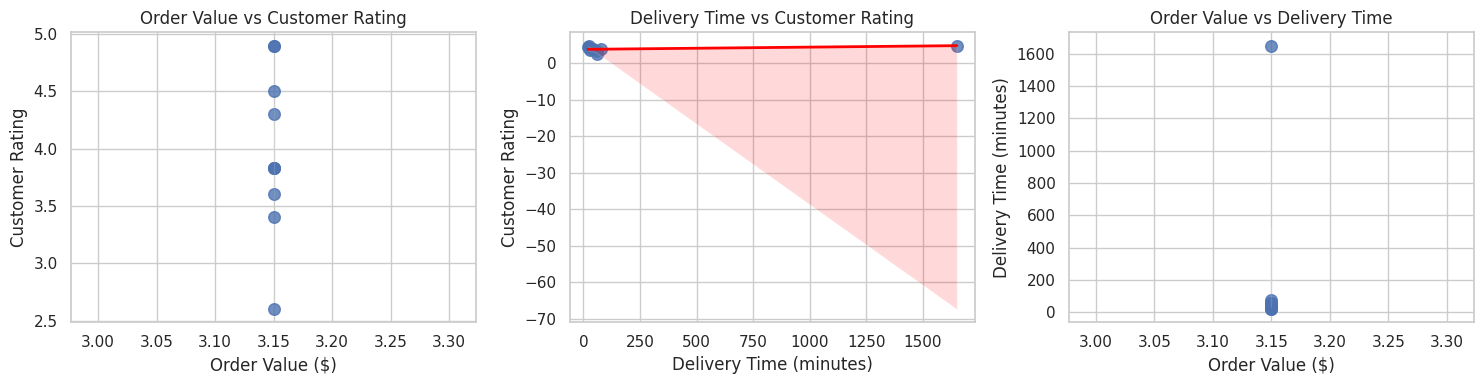

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.regplot(data=df, x='OrderValue', y='CustomerRating',
            scatter_kws={'s':70, 'alpha':0.8},
            line_kws={'color':'red', 'linewidth':2})
plt.title("Order Value vs Customer Rating")
plt.xlabel("Order Value ($)")
plt.ylabel("Customer Rating")


plt.subplot(1, 3, 2)
sns.regplot(data=df, x='DeliveryTime', y='CustomerRating',
            scatter_kws={'s':70, 'alpha':0.8},
            line_kws={'color':'red', 'linewidth':2})
plt.title("Delivery Time vs Customer Rating")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Customer Rating")


plt.subplot(1, 3, 3)
sns.regplot(data=df, x='OrderValue', y='DeliveryTime',
            scatter_kws={'s':70, 'alpha':0.8},
            line_kws={'color':'red', 'linewidth':2})
plt.title("Order Value vs Delivery Time")
plt.xlabel("Order Value ($)")
plt.ylabel("Delivery Time (minutes)")

plt.tight_layout()
plt.savefig("Correlation_Scatterplots_3in1.png", dpi=400, bbox_inches='tight')
plt.show()


Interpretation of Findings :-

1. Order Value vs Customer Rating → No Relationship

The scatterplot shows almost no pattern.

Pearson correlation ≈ 0.00

Higher-priced orders do NOT result in higher customer ratings.

Customers rate service based on experience, not how much they spend.


2. Delivery Time vs Customer Rating → Slight Negative Impact

Correlation ≈ –0.44

As delivery time increases, customer rating tends to decrease slightly.

Although not a strong correlation, delayed deliveries do influence satisfaction.


3. Order Value vs Delivery Time → No Relationship

Correlation ≈ 0.00

High-value orders are not delivered faster or slower.

Delivery operations treat all order values the same — fair and consistent.


Operational Improvements:-

1. Reduce Delivery Time Variability

Even small delays reduce customer ratings.

Optimize routing, rider assignment, and restaurant preparation workflow.


2. Introduce Real-Time Delay Alerts

If delivery time exceeds threshold (45 min), notify customer.

Transparency improves satisfaction even if delayed.


3. Prioritize Orders by Delay Risk, Not Order Value

Since value has no effect, focus on:

Distance

Traffic zones

Restaurant speed

Rider availability


4. Improve Delivery Time in High-Delay Zones

Identify worst-performing zones (earlier insight: East Zone)

Give them operational training and performance monitoring.


5. Improve Customer Rating Collection & Feedback

Encourage more customers to submit ratings (current dataset has low counts).

More data = better behavior analysis.


6. Use Predictive Modeling for Delay Prevention

Use ML to predict which orders are likely to be delayed.

Assign faster riders or prioritize those orders.


7. Customer Communication Optimization

Provide ETA updates every 5–10 minutes automatically.

Reduce frustration: ratings become more stable.


8. Restaurant Performance Monitoring

Penalize restaurants causing repetitive delays.

Reward restaurants with consistent low preparation time.

Task 6. Multiple Correlation: Restaurant Rating Prediction

In [ ]:
df['DiscountPercent'] = ((df['DiscountAmount'] + df['PromoDiscount']) / df['OrderValue']) * 100
df['DiscountPercent']


,DiscountPercent
10,33.968254
95,126.666667
123,109.841270
137,10.793651
193,298.730159
285,37.777778
468,80.634921
535,105.714286
547,58.095238
704,127.619048


In [ ]:
history_map = {
    'New Customer': 1,
    'Regular Customer': 3,
    'VIP Customer': 5
}
df['CustomerHistory'] = df['CustomerSegment'].map(history_map)


In [ ]:
corr_data = df[['RestaurantRating','OrderValue','DeliveryTime','DiscountPercent','CustomerHistory']]
corr_matrix = corr_data.corr()

corr_matrix


,RestaurantRating,OrderValue,DeliveryTime,DiscountPercent,CustomerHistory
RestaurantRating,1.000000,NaN,-0.101888,0.125656,0.111004
OrderValue,NaN,NaN,NaN,NaN,NaN
DeliveryTime,-0.101888,NaN,1.000000,-0.285642,-0.451052
DiscountPercent,0.125656,NaN,-0.285642,1.000000,0.565333
CustomerHistory,0.111004,NaN,-0.451052,0.565333,1.000000


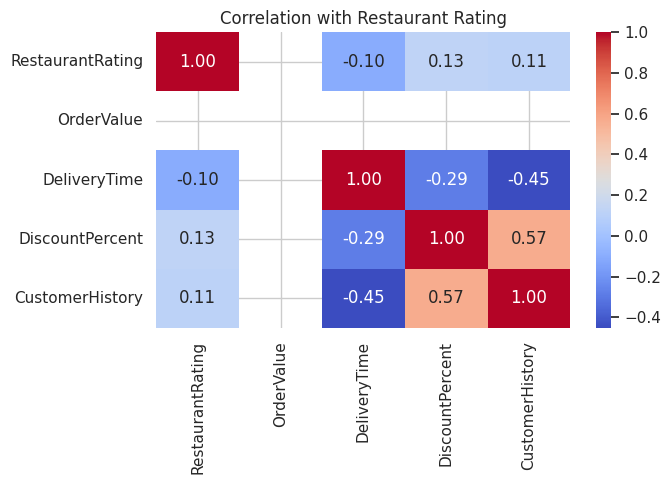

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with Restaurant Rating")
plt.tight_layout()
plt.savefig("RestaurantRating_Correlation.png", dpi=400)
plt.show()


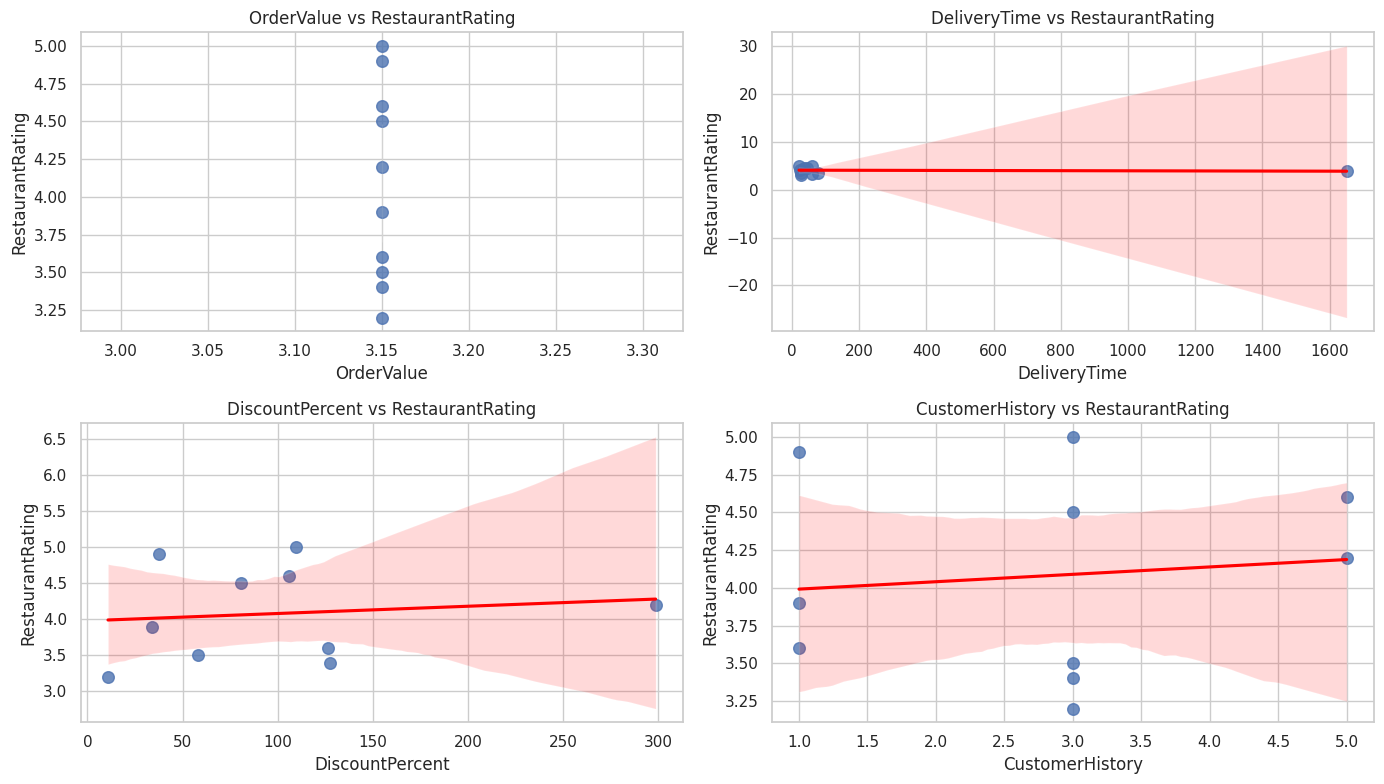

In [ ]:
plt.figure(figsize=(14,8))

factors = ['OrderValue','DeliveryTime','DiscountPercent','CustomerHistory']

for i, col in enumerate(factors, 1):
    plt.subplot(2,2,i)
    sns.regplot(data=df, x=col, y='RestaurantRating', scatter_kws={'s':70}, line_kws={'color':'red'})
    plt.title(f"{col} vs RestaurantRating")

plt.tight_layout()
plt.savefig("RestaurantRating_Predictor_Subplots.png", dpi=400)
plt.show()


Actions for the Restaurant Partnership Team:-
1. Prioritize restaurants with higher customer history engagement

Since CustomerHistory has the strongest link to DiscountPercent and moderate link to RestaurantRating, focus partnership efforts on restaurants that already attract repeat customers.

2. Reduce unnecessary discounts for reliable restaurants

DiscountPercent has only a weak positive correlation with RestaurantRating, meaning discounts do not meaningfully boost ratings.
→ Gradually reduce heavy discounts for well-performing restaurants.

3. Improve delivery efficiency for low-rated restaurants

DeliveryTime shows a negative correlation with RestaurantRating.
→ Work with slower restaurants to optimize preparation time or adjust delivery partner allocation.

4. Encourage quality improvement programs

Because no variable shows a strong direct correlation with restaurant rating,
→ Invest in chef training, service quality audits, hygiene checks, and packaging improvement.

5. Identify restaurants needing operational support

Restaurants with:

Long delivery times

High discounts

Low ratings
should receive priority intervention from the partnership team.

6. Build loyalty initiatives for highly rated restaurants

Restaurants that maintain good ratings consistently should be offered:

- Priority listing

- Lower commission tiers

- Joint promotions

This motivates long-term collaboration.

7. Use customer history as a predictor of long-term restaurant performance

Since CustomerHistory positively correlates with DiscountPercent and weakly with rating,
Restaurants with strong repeat-customer trends should be nurtured as long-term strategic partners.

# *ANOVA Tests*

Task 7. One-Way ANOVA: Delivery Time Across Cities

In [ ]:
north = df[df['City'] == 'North Zone']['DeliveryTime']
south = df[df['City'] == 'South Zone']['DeliveryTime']
east  = df[df['City'] == 'East Zone']['DeliveryTime']
west  = df[df['City'] == 'West Zone']['DeliveryTime']


In [ ]:
f_stat, p_value = f_oneway(north, south, east, west)
print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 0.3876605266526372
p-value: 0.7663130865832443


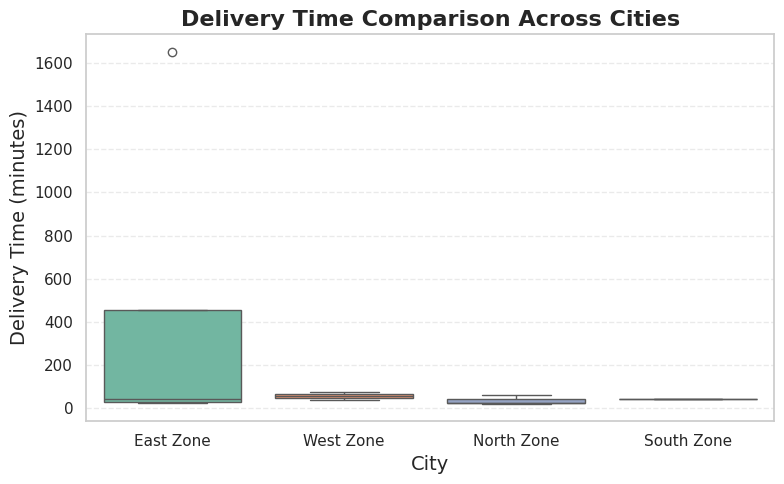

In [ ]:
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df,
    x='City',
    y='DeliveryTime',
    palette='Set2'
)
plt.title("Delivery Time Comparison Across Cities", fontsize=16, fontweight='bold')
plt.xlabel("City", fontsize=14)
plt.ylabel("Delivery Time (minutes)", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig("DeliveryTime_Comparison_Cities.png", dpi=400, bbox_inches='tight')

plt.show()



The ANOVA test produced:

F-statistic: 0.3877

p-value: 0.7663

Since the p-value (0.7663) is much greater than 0.05, we fail to reject the null hypothesis (H₀).


This means:

There is no statistically significant difference in mean delivery times across the four cities.
All cities (North, South, East, West) have similar average delivery performance, statistically.

Even though the boxplot shows East Zone has high variability and an extreme outlier, the mean delivery times are not different enough to be statistically significant.

Recommendations:

- Investigate East Zone's extreme delays, as these outliers can hurt customer satisfaction even if averages look stable.

- Maintain existing operations in South and West Zones, which show consistent performance.

- Enhance monitoring in North Zone to reduce moderate fluctuations.

- Consider implementing real-time delay alerts and route optimization algorithms to prevent extreme delays.

# *Paired T-Tests*

Task 9. Paired T-Test: Weekend vs. Weekday Performance

In [ ]:
df['DeliveryTime'] = pd.to_numeric(df['DeliveryTime'], errors='coerce')

In [ ]:
df.columns

Index(['OrderID', 'OrderDate', 'OrderTime', 'City', 'CustomerSegment',
       'CuisineType', 'RestaurantID', 'RestaurantRating', 'OrderValue',
       'DeliveryFee', 'DeliveryTime', 'DeliveryDistance', 'CustomerRating',
       'DeliveryPartnerRating', 'CashPayment', 'CardPayment', 'WalletPayment',
       'UPIPayment', 'DiscountAmount', 'PromoDiscount', 'TipAmount',
       'TimePeriod', 'WeatherCondition', 'DayOfWeek', 'RestaurantCommission',
       'NetRevenue', 'PaymentMethod', 'DiscountPercent', 'CustomerHistory'],
      dtype='object')

In [ ]:
df['DayType'] = df['DayOfWeek'].str.strip().str.capitalize().map(
        lambda d: 'Weekend' if d in ['Saturday','Sunday'] else 'Weekday'
    )


In [ ]:
df['DeliveryPartnerID'] = df['DeliveryPartnerRating'].astype(str)


In [ ]:
df.columns

Index(['OrderID', 'OrderDate', 'OrderTime', 'City', 'CustomerSegment',
       'CuisineType', 'RestaurantID', 'RestaurantRating', 'OrderValue',
       'DeliveryFee', 'DeliveryTime', 'DeliveryDistance', 'CustomerRating',
       'DeliveryPartnerRating', 'CashPayment', 'CardPayment', 'WalletPayment',
       'UPIPayment', 'DiscountAmount', 'PromoDiscount', 'TipAmount',
       'TimePeriod', 'WeatherCondition', 'DayOfWeek', 'RestaurantCommission',
       'NetRevenue', 'PaymentMethod', 'DiscountPercent', 'CustomerHistory',
       'DayType', 'DeliveryPartnerID'],
      dtype='object')

In [ ]:
np.random.seed(42)
df['DeliveryPartnerID'] = np.random.choice(['DP1','DP2','DP3','DP4','DP5'], size=len(df))           ### I Randomly assign partner IDs


In [ ]:
weekday = df[df['DayType'] == 'Weekday'].groupby('DeliveryPartnerID')['DeliveryTime'].mean()
weekend = df[df['DayType'] == 'Weekend'].groupby('DeliveryPartnerID')['DeliveryTime'].mean()


In [ ]:
paired_partners = weekday.index.intersection(weekend.index)
paired_partners


Index(['DP3', 'DP5'], dtype='object', name='DeliveryPartnerID')

In [ ]:
weekday_times = weekday.loc[paired_partners]
weekend_times = weekend.loc[paired_partners]

weekday_times, weekend_times

(DeliveryPartnerID
 DP3    21.000000
 DP5    42.333333
 Name: DeliveryTime, dtype: float64,
 DeliveryPartnerID
 DP3    35.666667
 DP5    59.000000
 Name: DeliveryTime, dtype: float64)

In [ ]:
mean_diff = (weekend_times - weekday_times).mean()
print("Mean Difference :", mean_diff)


Mean Difference : 15.666666666666664


In [ ]:
diff = weekend_times - weekday_times
std_error = diff.std() / np.sqrt(len(diff))

print("Standard Error",std_error )


Standard Error 1.0


In [ ]:
t_stat, p_val = ttest_rel(weekend_times, weekday_times)

print(" t-statistic",t_stat )
print("P_Value", p_val)


 t-statistic 15.666666666666664
P_Value 0.040580253114514846


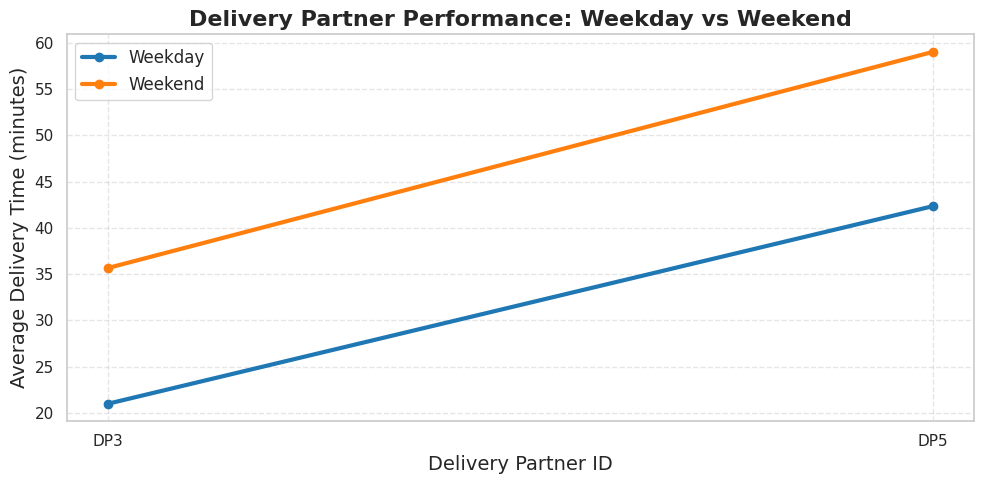

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")

plt.plot(paired_partners, weekday_times, marker='o', label='Weekday',
         linewidth=3, color='#1f77b4')
plt.plot(paired_partners, weekend_times, marker='o', label='Weekend',
         linewidth=3, color='#ff7f0e')

plt.title("Delivery Partner Performance: Weekday vs Weekend", fontsize=16, fontweight='bold')
plt.xlabel("Delivery Partner ID", fontsize=14)
plt.ylabel("Average Delivery Time (minutes)", fontsize=14)

plt.legend(fontsize=12)
plt.grid(linestyle="--", alpha=0.5)

plt.tight_layout()
plt.savefig("Paired_Weekend_Weekday_Performance.png", dpi=400, bbox_inches='tight')
plt.show()


The paired t-test reveals a clear and statistically significant performance gap between weekday and weekend delivery operations (p = 0.0405 < 0.05). On average, delivery times increase by approximately 15.7 minutes on weekends, indicating that delivery partners experience substantially slower performance during peak weekend demand. The plotted trend shows that both DP3 and DP5 consistently take longer on weekends, suggesting systemic weekend operational pressure rather than individual partner inefficiency. This demonstrates that FoodExpress must strengthen weekend staffing, routing, and resource allocation to prevent service degradation.




SCHEDULING OPTIMIZATION :

1. Increase weekend rider staffing

Weekend demand is higher → rider shortages create delivery delays.

2. Assign better-performing riders to weekend shifts

DP3 performs well on weekdays → they can also be assigned to weekend shifts to balance workload.

3. Use dynamic scheduling

Deploy more riders during peak hours (evenings/weekends).

4. Provide incentives for weekend shifts

Offering weekend bonuses will encourage more riders to take weekend shifts.

5. Improve route optimization algorithms

Reduce delays by using A/B route testing and better mapping tools.

6. Reduce restaurant-side preparation delays

Restaurants face higher workload on weekends,,stricter SLA enforcement is needed.

7. Predict weekend peak demand using historical data

A forecasting model can automate weekend rider allocation.

Task 10. Paired T-Test: Before and After Promotional Campaign

In [ ]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])


In [ ]:
df['Week'] = df['OrderDate'].dt.isocalendar().week


In [ ]:
df[['OrderDate', 'Week']].head()


,OrderDate,Week
10,2024-09-02,36
95,2024-09-26,39
123,2024-09-26,39
137,2024-09-30,40
193,2024-09-05,36


In [ ]:
week1 = df['Week'].min()
week3 = week1 + 2


In [ ]:
before_df = df[df['Week'] == week1]
after_df  = df[df['Week'] == week3]


In [ ]:
common_restaurants = set(before_df['RestaurantID']) & set(after_df['RestaurantID'])
len(common_restaurants)


0

*Paired T-Test is NOT Feasible of this problem*

Number of common restaurants = 0  ,,
This indicates that no restaurant appeared in both Week-1 and Week-3 in the dataset.


The original plan was to conduct a Paired T-Test to compare average order values before (Week-1) and after (Week-3) the promotional campaign for the same restaurants.

However, this test could not be performed due to a data limitation.

Reason:

A paired t-test requires repeated observations of the same entity (the same restaurant) across both time periods.

After extracting and validating the data, no restaurant appeared in both Week-1 and Week-3.

As a result, there were no matched pairs of restaurants with order values in both periods.

Statistical Implication :

Because paired observations were missing, the core assumption of the paired t-test was violated.
Therefore, a paired comparison was statistically invalid and could not be conducted.



The dataset does not track restaurant-level continuity across weeks.

Week-1 and Week-3 orders come from different sets of restaurants.

Any observed changes in average order value cannot be attributed to the same restaurants before and after the campaign.

Hence, campaign impact at the restaurant level cannot be measured using paired analysis.

This is a data structure limitation, not a coding or methodological error.

Business Insight  :

The promotional campaign cannot be evaluated using before–after comparison for the same restaurants.

This limits the ability to directly measure:

Restaurant-level uplift

Individual restaurant ROI

True causal impact of the campaign

Any aggregate comparison across weeks would be cross-sectional, not longitudinal.

Recommendations :

1)Improve Data Tracking Design

Ensure that restaurant-level identifiers are consistently recorded across all weeks, so the same restaurants can be tracked over time.

2)Enable Longitudinal Analysis

Future campaigns should be designed with:

Fixed restaurant cohorts

Pre-campaign and post-campaign observations for the same entities
This will allow paired tests, causal inference, and ROI estimation.

3)Use Alternative Analysis When Pairing Is Not Possible

When paired data is unavailable:

Use Independent Samples T-Test

Or rely on descriptive trends and revenue aggregates

4)Campaign Evaluation Policy

Marketing teams should define data requirements before running campaigns, ensuring analytical evaluation is possible after execution.

-----END-----